In [28]:
import sys
import numpy as np 
import pandas as pd
sys.path.append("code/.")
np.random.seed(42) # for reproducibility
from plotting_functions import *
from utils import *

In [29]:
toy_job_df = pd.read_csv('data/toy_job_happiness.csv')
toy_job_df

,supportive_colleagues,hours_flexibility,start_up,coffee_machine,boss_vegan,happy?
0,1,1,1,0,0,happy
1,1,1,0,0,1,happy
2,1,0,1,1,0,happy
3,0,1,0,0,0,unhappy
4,0,1,1,1,0,unhappy
5,1,0,0,1,0,happy
6,1,1,0,1,0,happy
7,0,0,1,0,1,unhappy
8,1,0,1,0,0,unhappy
9,0,0,0,1,0,unhappy


In [30]:
features = toy_job_df.columns.tolist()
features

['supportive_colleagues',
 'hours_flexibility',
 'start_up',
 'coffee_machine',
 'boss_vegan',
 'happy?']

In [31]:
X = toy_job_df.drop(columns=['happy?'])
y = toy_job_df['happy?']

type(X)

pandas.core.frame.DataFrame

In [32]:
type(y)

pandas.core.series.Series

In [33]:
### Baseline 
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X, y)
dummy.predict(X)

array(['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy',
       'happy', 'happy', 'happy', 'happy'], dtype='<U5')

In [34]:
new_example = [[1,0,0,1,1]]

In [35]:
dummy.score(X,y)

0.5454545454545454

In [36]:
from sklearn.tree import DecisionTreeClassifier
happiness_tree = DecisionTreeClassifier() # instantiate the tree
happiness_tree.fit(X, y)

DecisionTreeClassifier()

In [37]:
happiness_tree.score(X,y)

1.0

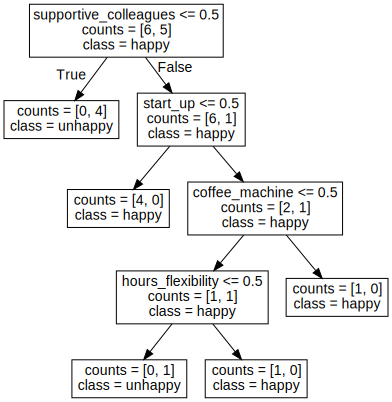

In [38]:
display_tree(X.columns, happiness_tree, counts=True) # model visualization

In [48]:
tr = DecisionTreeClassifier(max_depth=3)
tr.fit(X[['supportive_colleagues', 'coffee_machine']], y)

DecisionTreeClassifier(max_depth=3)

In [49]:
X[['supportive_colleagues', 'coffee_machine']]

,supportive_colleagues,coffee_machine
0,1,0
1,1,0
2,1,1
3,0,0
4,0,1
5,1,1
6,1,1
7,0,0
8,1,0
9,0,1


/Users/kvarada/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


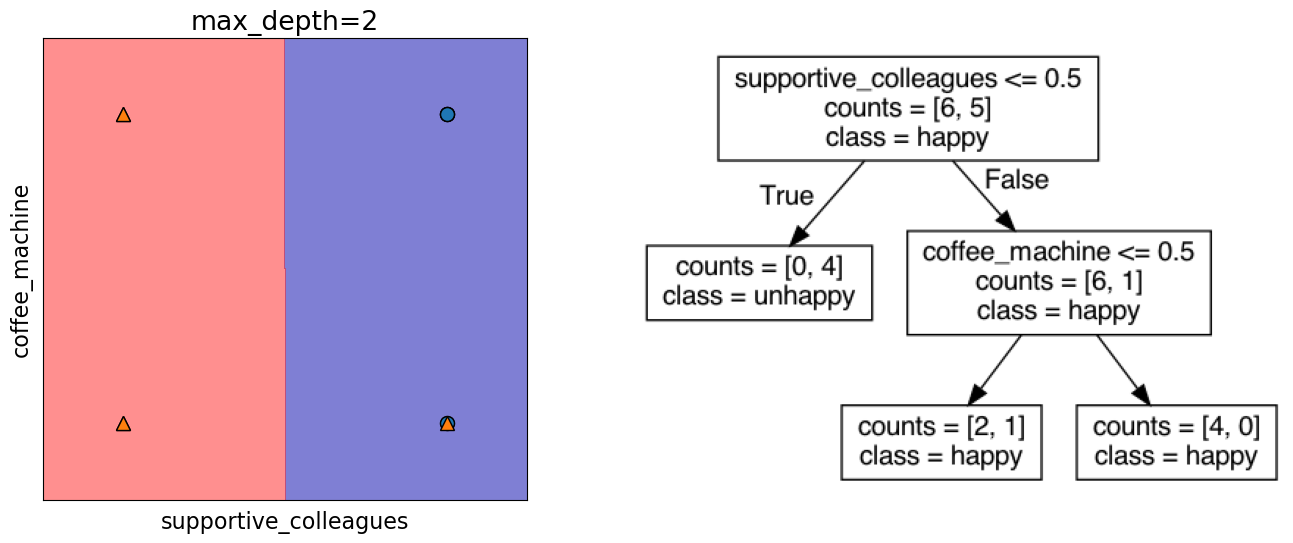

In [50]:
plot_tree_decision_boundary_and_tree(
    tr, X[['supportive_colleagues', 'coffee_machine']], y, x_label="supportive_colleagues", y_label="coffee_machine"
)